# Assignment #3 - Machine Learning - DSSA-5201

Instructor: John Sokol<br>
Spring 2024

Name: Ryan Nguyen
<br>
Date: 2 May 2024

<b>Assignment 3: Implement a FastAPI Endpoint.</b> <br>

In [52]:
import pandas as pd                 # Import pandas for data manipulation
import matplotlib.pyplot as plt     # Import matplotlib for plotting
import seaborn as sns               # Import seaborn for enhanced visualization features

# Load the dataset
data_path = 'C:/Users/RyanPC/OneDrive/Desktop/Stockton/Spring 2024/Machine Learning/assignment 3/Advertising.csv'
data = pd.read_csv(data_path)

In [70]:
### Exploratory Data Analysis

# Display the first few rows of the dataset
data.head(), data.columns

# Calculate min, max, and mean for each advertising channel
stats = data[['TV', 'Radio', 'Newspaper']].agg(['min', 'max', 'mean'])
print(stats)


            TV   Radio  Newspaper
min     0.7000   0.000      0.300
max   296.4000  49.600    114.000
mean  147.0425  23.264     30.554


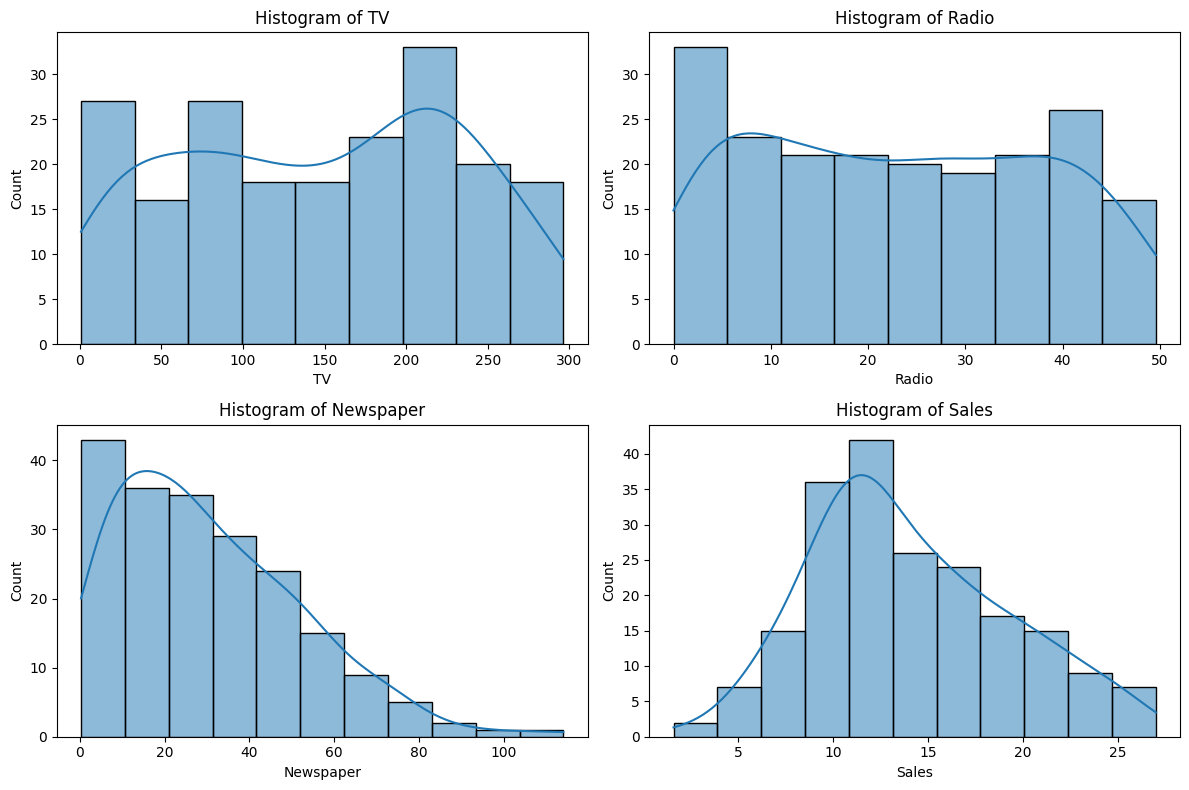

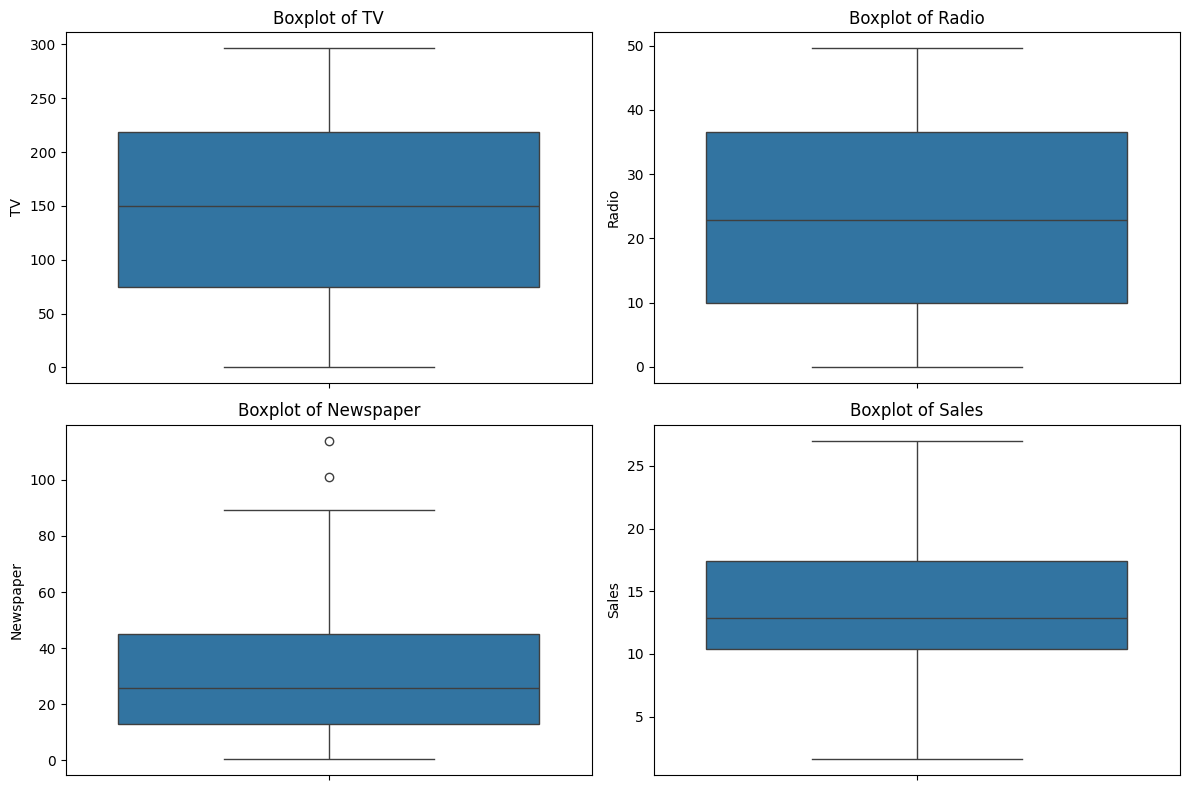

In [54]:
# Creating histograms for each feature including the target variable
plt.figure(figsize=(12, 8))        # Set the size of the figure for the plots
for i, column in enumerate(data.columns[1:], 1):  # Loop over each column, starting from the second column
    plt.subplot(2, 2, i)           # Create a subplot for each histogram
    sns.histplot(data[column], kde=True)  # Generate a histogram with a kernel density estimate
    plt.title(f'Histogram of {column}')  # Set the title for each histogram
plt.tight_layout()                 # Adjust subplots to fit into the figure area
plt.show()                         # Display the histograms

# Creating boxplots for each feature including the target variable
plt.figure(figsize=(12, 8))        # Set the size of the figure for the plots
for i, column in enumerate(data.columns[1:], 1):  # Loop over each column, starting from the second column
    plt.subplot(2, 2, i)           # Create a subplot for each boxplot
    sns.boxplot(y=data[column])    # Generate a boxplot
    plt.title(f'Boxplot of {column}')  # Set the title for each boxplot
plt.tight_layout()                 # Adjust subplots to fit into the figure area
plt.show()                         # Display the boxplots


In [69]:
# Newspapers appears to have two outliers, let's identify them

# Calculate the first (Q1) and third (Q3) quartiles of the 'Newspaper' column
Q1 = data['Newspaper'].quantile(0.25)  # Calculate the 25th percentile
Q3 = data['Newspaper'].quantile(0.75)  # Calculate the 75th percentile

# Calculate the Interquartile Range (IQR) by subtracting Q1 from Q3
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR  # Outliers are below this
upper_bound = Q3 + 1.5 * IQR  # Outliers are above this

# Filter the data to find points that fall outside of the lower and upper bounds
outliers = data[(data['Newspaper'] < lower_bound) | (data['Newspaper'] > upper_bound)]

# Print the outliers
print("Outliers in the Newspaper data:")
print(outliers)
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")


Outliers in the Newspaper data:
     Unnamed: 0     TV  Radio  Newspaper  Sales
16           17   67.8   36.6      114.0   12.5
101         102  296.4   36.3      100.9   23.8
Lower bound: -35.775000000000006, Upper bound: 93.625


In [ ]:
### Analyzing the Outliers

##Outlier Values
#At index 16, a Newspaper spend of 114.0 units occurs alongside a TV spend of 67.8 and Radio spend of 36.6, resulting in sales of 12.5 units.
#At index 101, a Newspaper spend of 100.9 units with a very high TV spend of 296.4 and Radio spend of 36.3 leads to sales of 23.8 units.

#Contextual Relevance
#Magnitude and Impact: The outlier at index 16, with a Newspaper spend significantly higher than the typical range, may need scrutiny to understand if this was an exceptional circumstance or an error. Given the moderate sales result (12.5), it seems like an inefficient allocation if it's not a data entry error.
#Consistency with Other Media Spends: The outlier at index 101 involves high spends across channels but particularly in TV, which correlates with high sales (23.8), suggesting it may be an effective overall strategy despite the unusually high Newspaper spend.

#Decision to Keep or Remove
#Keep:If these outliers represent true data points (not errors) and reflect possible, albeit rare, advertising strategies, they should be retained to maintain the integrity of the model's ability to predict under varied conditions.
#Remove: If an analysis suggests these points are errors or so rare that they distort the general predictive capability of the model, they may be removed. Especially if you expect future data to not include such extreme cases.

#Decide to keep since the value is not 'extreme' relative to what was identified in the IQR and to maintain data integrity


In [55]:
#Build the Linear Regression Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the features and target variable
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [57]:
# Create a linear regression model
model = LinearRegression()

In [58]:
# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [59]:
# Predict the sales on the testing data
y_pred = model.predict(X_test)

In [60]:
# Calculate the coefficients, intercept, Mean Squared Error (MSE), and R-squared value
coefficients = model.coef_
intercept = model.intercept_
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(coefficients, intercept, mse, r2)


(array([ 0.04458402,  0.19649703, -0.00278146]),
 2.994893030495323,
 4.40211829144968,
 0.8601145185017869)

In [61]:
#Coefficients:
#TV: 0.0446
#Radio: 0.1965
#Newspaper: -0.0028
#Intercept: 2.9949
#Mean Squared Error (MSE): 4.4021
#R-squared value: 0.8601

In [62]:
#Radio advertising has the highest positive impact on sales per unit of budget.
#TV advertising also positively influences sales, though less strongly than radio.
#Newspaper advertising shows a very slight negative impact, indicating it might not be an effective channel relative to the others.

In [63]:
#Intercept vakue of 2.9949 means that if there is no investment in TV, Radio, or Newspaper advertising, expected sales would still be approximately 2.9949 units.
#Mean Squared Error (MSE) value of 4.4 indicates the model is a good fit since the sales figure range from 1.6 to 27. A lower MSED indicates a model that better
#fits the data, as it implies smaller average errors between predicted and actual values.
#The R-squared value of 0.8601 indicates that the model explains about 86% of the variance in sales, which is a strong fit for real-world data.

In [67]:
# Save the model as a joblib file. 
from joblib import dump

dump(model, 'C:/Users/RyanPC/OneDrive/Desktop/advertising_sales_prediction/models/linear_regerssion_model.joblib')

['C:/Users/RyanPC/OneDrive/Desktop/Stockton/Spring 2024/Machine Learning/assignment 3/ML_Assignment3_Nguyen.ipynb']